<a href="https://colab.research.google.com/github/nikitagupta09/Datascience/blob/main/Incomeclassification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=45b0a04f9864c67ea5e0eac937edb4fd6a9bae9ee5728157ae5cbe4105c75989
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [5]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/nikitagupta09/Datascience/main/income_evaluation7%20-%20cleaned.csv"
)

In [6]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- The data.head() syntax is used to display the first few rows of a Pandas
   DataFrame named data.
- Specifically, it returns the first 5 rows by default.
- This is often useful for large dataset to quickly inspect the structure and content of the DataFrame without displaying the entire dataset.

In [7]:
 #1 What are the data types? (Only numeric and categorical)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5108 entries, 0 to 5107
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5108 non-null   int64 
 1   workclass       5108 non-null   object
 2   fnlwgt          5108 non-null   int64 
 3   education       5108 non-null   object
 4   education-num   5108 non-null   int64 
 5   marital-status  5108 non-null   object
 6   occupation      5108 non-null   object
 7   relationship    5108 non-null   object
 8   race            5108 non-null   object
 9   sex             5108 non-null   object
 10  capital-gain    5108 non-null   int64 
 11  capital-loss    5108 non-null   int64 
 12  hours-per-week  5108 non-null   int64 
 13  native-country  5108 non-null   object
 14  income          5108 non-null   object
dtypes: int64(6), object(9)
memory usage: 598.7+ KB


- The output from the info() method summarizes the DataFrame structure.
It contains 5,108 entries, each with 15 attributes.
- There are six numeric columns (age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week) of type int64, and nine categorical columns (workclass, education, marital-status, occupation, relationship, race, sex, native-country, income) of type object.
- There are no missing values in the DataFrame, and it occupies approximately 598.7 KB of memory.

In [9]:
#2 Checking for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)




Missing values in each column:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


- Column Names (Index): The names of the DataFrame columns are listed on the left side. In your case, columns include 'age', 'workclass', 'fnlwgt', 'education', and so on.

- Values: The numbers on the right side represent the count of missing values in each corresponding column. In this example, all columns have a count of 0, which means there are no missing values in any column.

- int64: This indicates the data type of the values in the Series. In this case, all counts are of type int64, which is a 64-bit integer.

In [ ]:
#3 Exploring the distributions of numeric variables
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_distributions = data[numeric_columns].describe()

missing_values, numeric_distributions


(age               0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
 dtype: int64,
                age        fnlwgt  education-num  capital-gain  capital-loss  \
 count  5108.000000  5.108000e+03    5108.000000   5108.000000   5108.000000   
 mean     38.626860  1.905987e+05      10.073806   1044.851997     93.828113   
 std      13.604218  1.061459e+05       2.539185   7127.470131    410.861988   
 min      17.000000  1.930200e+04       1.000000      0.000000      0.000000   
 25%      28.000000  1.177862e+05       9.000000      0.000000      0.000000   
 50%      37.000000  1.791225e+05      10.000000      0.000000      0.000000   
 75%      47.000000  2.416185e+05      12.000000      0.000000      0.000000   
 max      90.000000  1.033222e

- Missing Values: The count of missing values in each numeric column is zero, indicating that there are no missing values in these columns.

- Numeric Distributions: The numeric_distributions DataFrame provides summary statistics for each numeric column.
It includes information such as the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum values.

- This code and output are useful for gaining an initial understanding of the distribution and characteristics of numeric variables in the dataset.
 It's common practice in exploratory data analysis to check for missing values and analyze the summary statistics of key variables.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import numpy as np




In [ ]:
#4 Preparing the data for feature selection
# Encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Defining the target variable
target = 'income_>50K'

# Splitting the dataset into features and target variable
X = data_encoded.drop(target, axis=1)
y = data_encoded[target]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Method 1: Feature Importance from Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances_rf = pd.Series(rf.feature_importances_, index=X.columns)

# Method 2: SelectKBest with chi-squared
select_k_best = SelectKBest(score_func=chi2, k='all')
select_k_best.fit(X_train, y_train)
feature_importances_chi2 = pd.Series(select_k_best.scores_, index=X.columns)

# Method 3: SelectKBest with ANOVA F-value
select_k_best_f = SelectKBest(score_func=f_classif, k='all')
select_k_best_f.fit(X_train, y_train)
feature_importances_f = pd.Series(select_k_best_f.scores_, index=X.columns)

# Combining the results
feature_importance_df = pd.DataFrame({
    'Random Forest': feature_importances_rf,
    'Chi-Squared': feature_importances_chi2,
    'ANOVA F-Value': feature_importances_f
}).sort_values(by='Random Forest', ascending=False)

feature_importance_df.head(10)  # Displaying top 10 features from Random Forest for brevity

,Random Forest,Chi-Squared,ANOVA F-Value
age,0.135151,1.039274e+03,227.545062
fnlwgt,0.129808,2.102047e+05,3.579933
capital-gain,0.089383,9.121122e+06,204.876052
hours-per-week,0.081679,8.512485e+02,245.162924
marital-status_Married-civ-spouse,0.078119,4.840916e+02,1143.513396
education-num,0.064676,2.611501e+02,458.074872
marital-status_Never-married,0.037155,2.935130e+02,489.570468
capital-loss,0.033186,2.161504e+05,123.970766
relationship_Not-in-family,0.023006,1.330405e+02,187.295683
occupation_Exec-managerial,0.022714,1.659625e+02,198.356294


- Categorical variables are one-hot encoded to prepare the data for feature selection.
- he dataset is split into training and test sets.
- Feature importances are calculated using three different methods: Random Forest, Chi-Squared, and ANOVA F-Value.
- The results are combined into a DataFrame (feature_importance_df) for comparison.
- The top 10 features based on Random Forest feature importances are displayed.
- This code is a part of the feature selection process, where different methods are used to assess the importance of each feature in predicting the target variable.
 The summary statistics obtained from various methods  helps in selecting the most relevant features for building predictive models.







 #5 Which independent variables have missing data? How much?
--> There are no missing values in independent variables


In [ ]:
#6 Confirming if the training and test sets have the same data
train_test_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Training Set Mean': X_train.mean(),
    'Test Set Mean': X_test.mean()
})

#7 Checking for correlation among predictor variables
predictor_correlation = X.corr()

train_test_comparison.head(), predictor_correlation.head()


(                     Feature  Training Set Mean  Test Set Mean
 age                      age          38.697259      38.345401
 fnlwgt                fnlwgt      190019.215859  192915.544031
 education-num  education-num          10.071953      10.081213
 capital-gain    capital-gain        1011.962066    1176.347358
 capital-loss    capital-loss          93.964023      93.284736,
                     age    fnlwgt  education-num  capital-gain  capital-loss  \
 age            1.000000 -0.079464       0.019367      0.062319      0.059689   
 fnlwgt        -0.079464  1.000000      -0.062241     -0.003600     -0.004800   
 education-num  0.019367 -0.062241       1.000000      0.116059      0.099200   
 capital-gain   0.062319 -0.003600       0.116059      1.000000     -0.033484   
 capital-loss   0.059689 -0.004800       0.099200     -0.033484      1.000000   
 
                hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
 age                  0.041315               0.04

- The train_test_comparison DataFrame allows you to compare the mean values of features between the training and test sets.
  This is important to ensure that the datasets have similar statistical characteristics, which is crucial for model generalization.

- The predictor_correlation DataFrame contains the correlation matrix among predictor variables.
  It provides insights into how features are correlated with each other.

- This code segment is useful for assessing the consistency between training and test sets and understanding the correlation structure among predictor variables.
 Such checks are crucial in ensuring the reliability and generalization ability of machine learning models. If the training and test sets differ significantly or if there are strong correlations among predictors, it may impact the model's performance and generalizability.







#8 Which Predictor Variables are the Most Important?
Already identified the most important predictor variables using three feature selection methods: Random Forest, Chi-Squared, and ANOVA F-Value

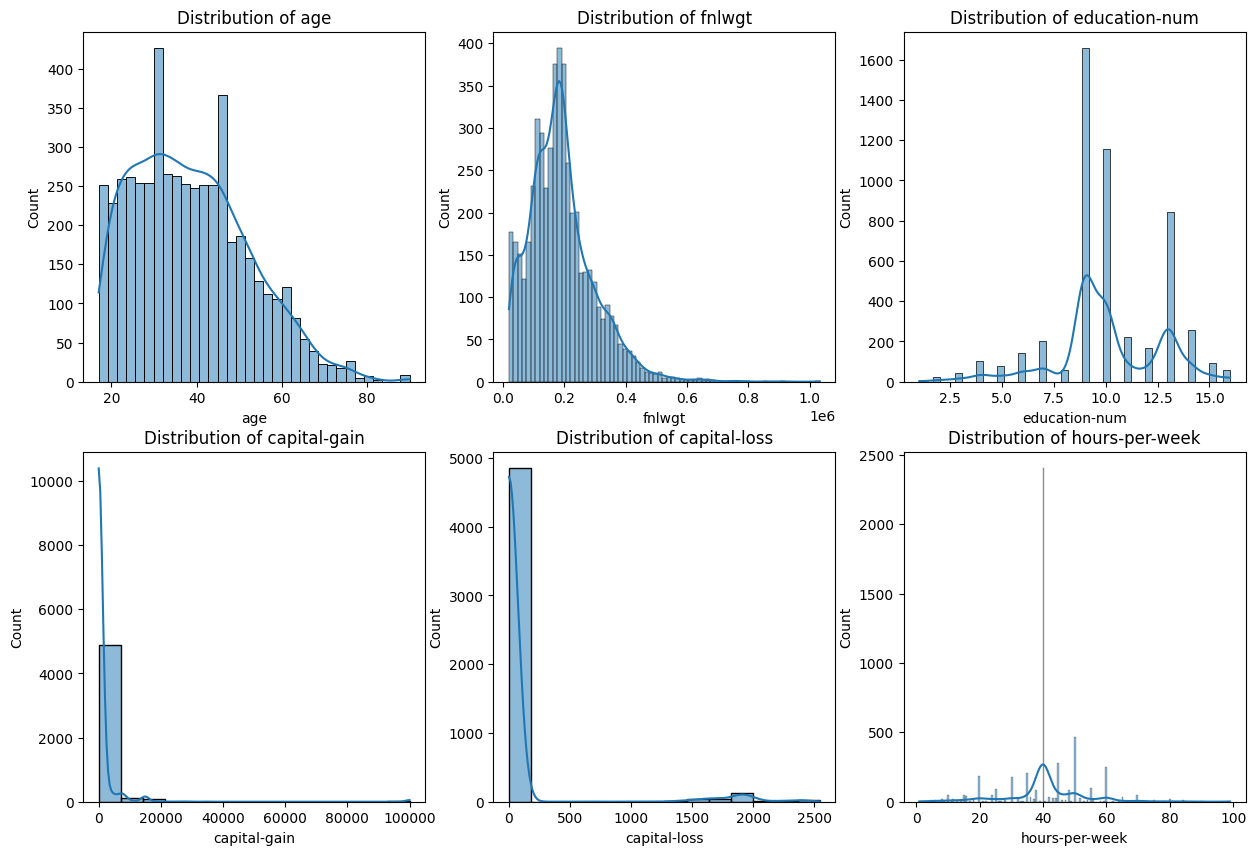

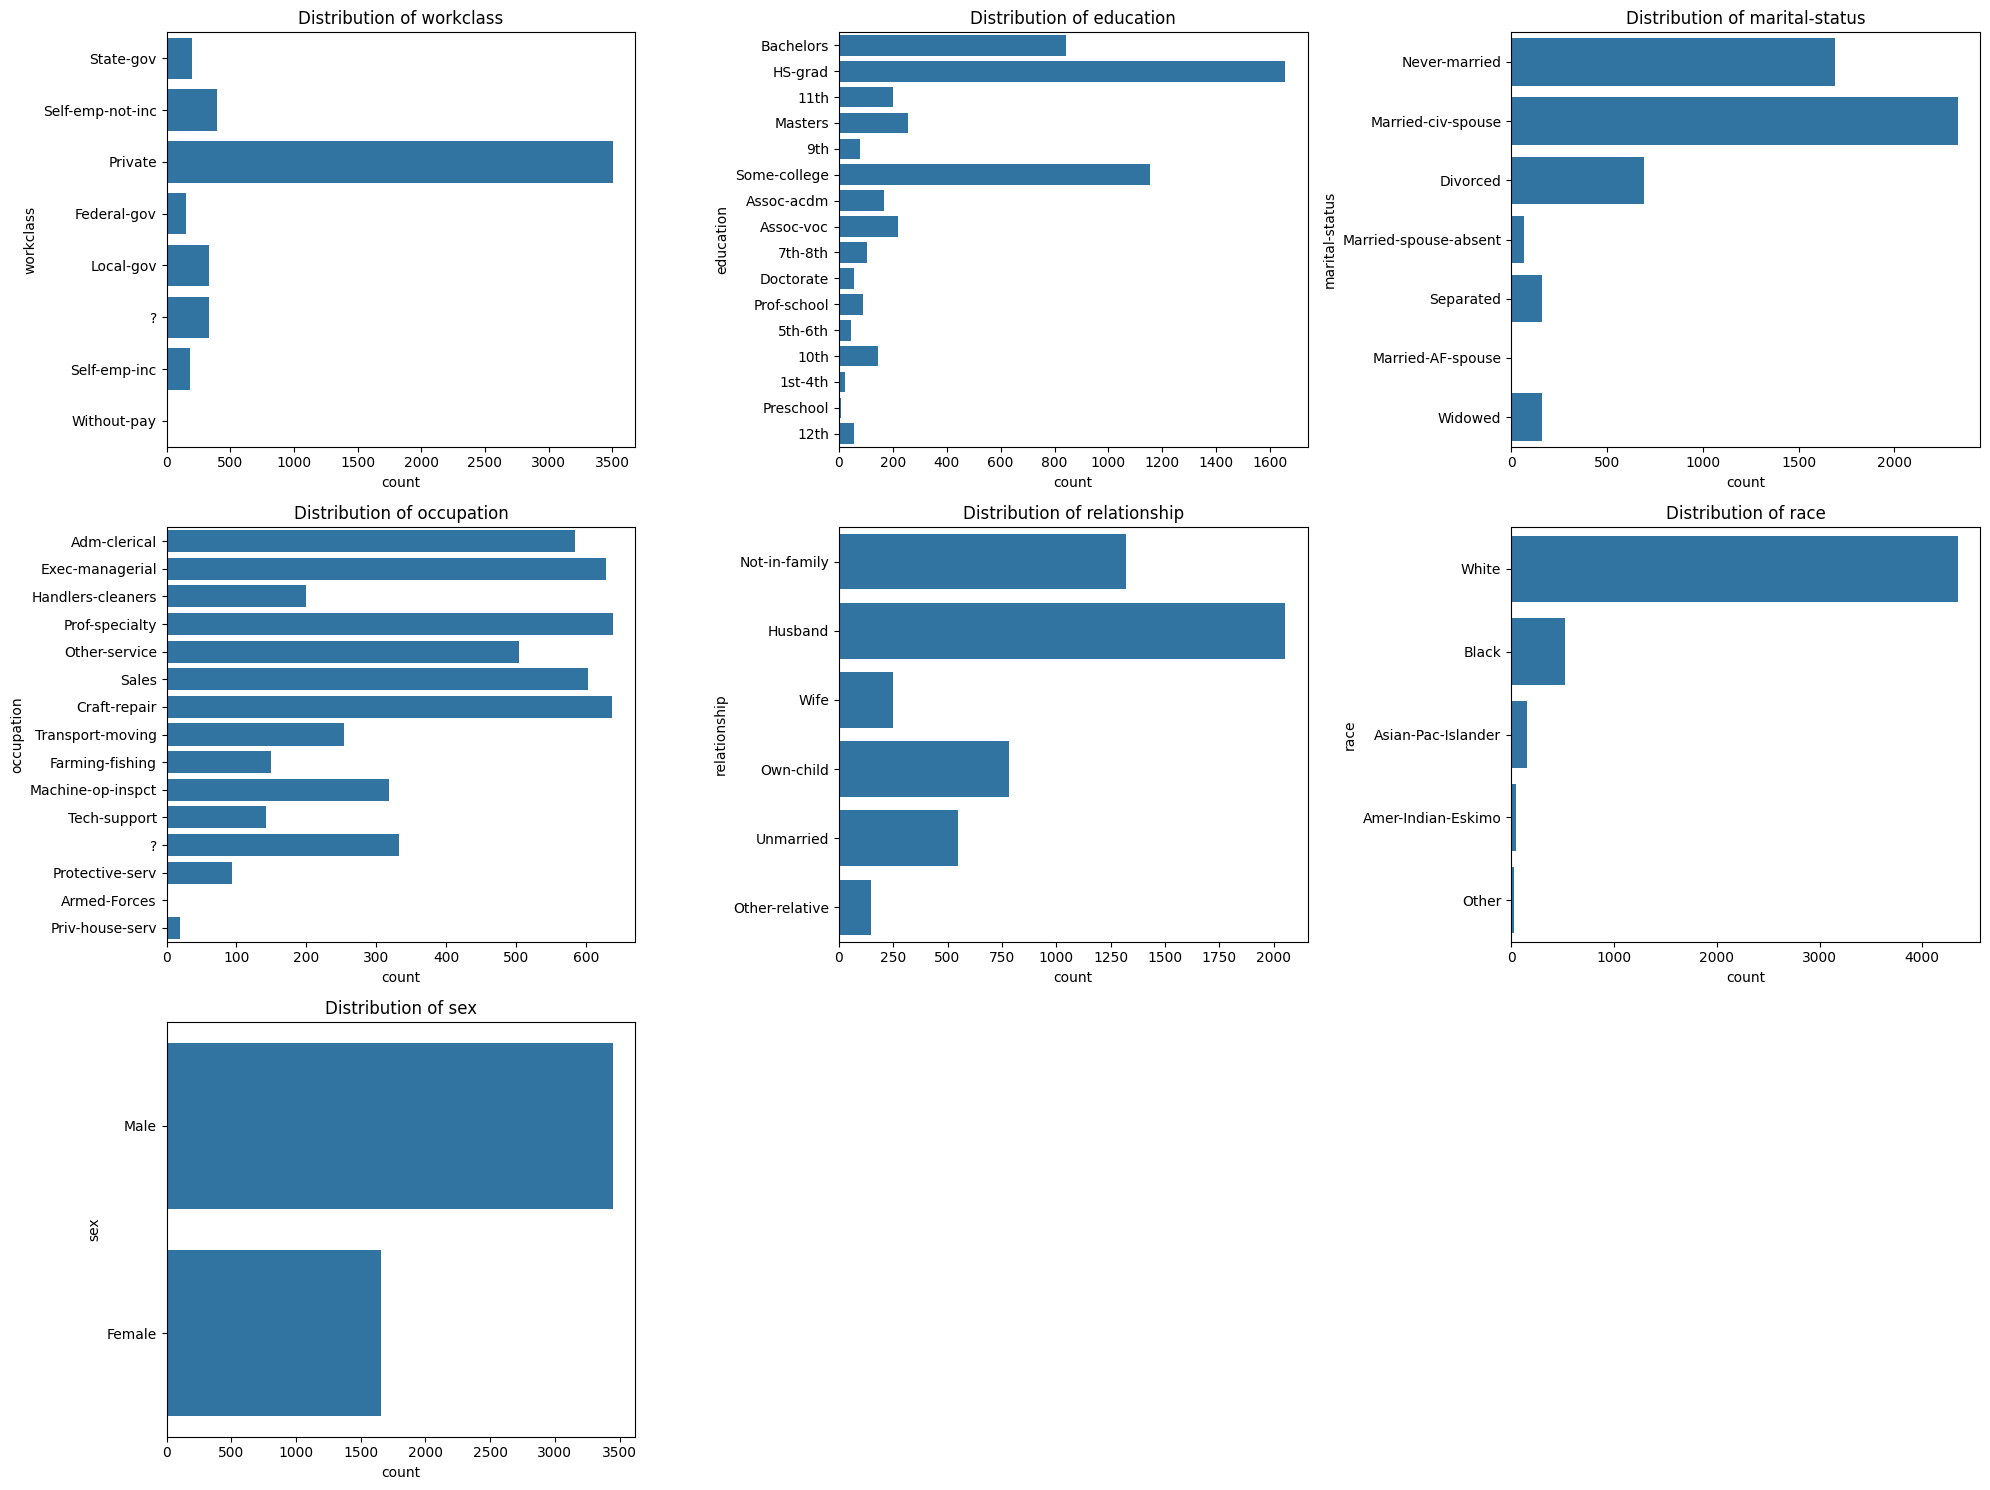

,min,max
age,17,90
fnlwgt,19302,1033222
education-num,1,16
capital-gain,0,99999
capital-loss,0,2547
hours-per-week,1,99


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#9 Analyzing the ranges of the predictor variables
ranges = data[numeric_columns].agg(['min', 'max']).T

#10 Examining the distributions of numeric predictor variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

#10 Examining distributions of some key categorical predictor variables
key_categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
plt.figure(figsize=(20, 15))
for i, col in enumerate(key_categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=data[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

ranges



1. Distribution of age: This histogram shows the frequency distribution of the 'age' variable. The distribution looks somewhat right-skewed, meaning there are more younger individuals than older ones in the dataset. The blue line could represent a kernel density estimate that shows the distribution shape.

2. Distribution of fnlwgt (final weight): This histogram displays the distribution of 'fnlwgt', which typically represents some weight assigned to the observations. The graph suggests a right-skewed distribution with most values clustered at the lower end.

3. Distribution of education-num: This histogram shows the distribution of 'education-num', likely representing the number of education years completed by individuals. It appears to have several peaks (multimodal), suggesting that certain education levels are more common than others.

4. Distribution of capital-gain: The 'capital-gain' distribution is highly skewed to the right, with most individuals having no or very low capital gains, and a few individuals having high capital gains.

5. Distribution of capital-loss: Similar to 'capital-gain', 'capital-loss' is also right-skewed, indicating that most individuals do not report a capital loss, with a few exceptions.

6. Distribution of hours-per-week: This histogram represents the number of hours worked per week. It appears to be somewhat normally distributed around the typical 40-hour workweek, with additional smaller peaks possibly indicating part-time and overtime work hours.

--> The bar graphs represent the counts of records within various categories of each variable. Accompanying the image a list of numerical variables with their minimum and maximum values, which are likely separate from these bar graphs. Here's an analysis of the bar graphs:

1. Distribution of workclass: The various classes of work such as 'Private', 'Self-emp-not-inc', 'Local-gov', etc., are displayed, showing the count of individuals in each work class.

2. Distribution of education: The educational attainment of individuals, with categories ranging from 'Preschool' to 'Doctorate'. The graph shows how many individuals fall into each educational category.

3. Distribution of marital-status: This graph displays marital status categories like 'Never-married', 'Divorced', 'Married-civ-spouse', etc., and their respective counts.

4. Distribution of occupation: Different occupations like 'Adm-clerical', 'Exec-managerial', 'Prof-specialty', etc., are represented, with the count of people in each occupation.

5. Distribution of relationship: The types of family relationships present in the dataset, such as 'Not-in-family', 'Husband', 'Wife', etc., and their counts.

6. Distribution of race: The count of individuals across different racial groups like 'White', 'Black', 'Asian-Pac-Islander', etc.

7. Distribution of sex: A binary representation of gender, showing counts of 'Male' and 'Female' individuals.

Now, regarding the numerical range details:

- The age variable ranges from 17 to 90, indicating the dataset includes a wide range of adult ages.
- fnlwgt represents the final weight, which could relate to the number of - people the census believes the entry represents, with a range from 19,302 to 1,033,222.
- education-num likely corresponds to the number of years of education completed, ranging from 1 to 16.
- capital-gain ranges from 0 to 99,999, indicating the additional income people might have from investments or other sources besides work.
- capital-loss ranges from 0 to 2,547, showing the losses people might have incurred.
- hours-per-week varies from 1 to 99, reflecting the number of hours individuals work per week.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
import numpy as np

#11 Removing outliers from 'capital-gain'
Q1 = data['capital-gain'].quantile(0.25)
Q3 = data['capital-gain'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ~((data['capital-gain'] < (Q1 - 1.5 * IQR)) | (data['capital-gain'] > (Q3 + 1.5 * IQR)))

# Comparing models with and without outliers
def evaluate_model(data):
    X = pd.get_dummies(data.drop('income', axis=1), drop_first=True)
    y = data['income'].apply(lambda x: 1 if x == '>50K' else 0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

accuracy_with_outliers = evaluate_model(data)
accuracy_without_outliers = evaluate_model(data[outlier_condition])

#12 Removing 1%, 5%, and 10% of 'age' data randomly and imputing
def impute_numeric_data(removal_percent):
    data_copy = data.copy()
    np.random.seed(42)
    removal_indices = np.random.choice(data_copy.index, size=int(len(data_copy)*removal_percent), replace=False)
    data_copy.loc[removal_indices, 'age'] = np.nan

    # Different imputation methods
    imputers = {
        'Mean Imputation': SimpleImputer(strategy='mean'),
        'Median Imputation': SimpleImputer(strategy='median'),
        'KNN Imputation': KNNImputer(n_neighbors=5)
    }

    imputation_results = {}
    for name, imputer in imputers.items():
        data_imputed = data_copy.copy()
        data_imputed['age'] = imputer.fit_transform(data_imputed[['age']]).ravel()
        error = ((data_imputed['age'] - data['age'])**2).mean()
        imputation_results[name] = error

    return imputation_results

imputation_results_1 = impute_numeric_data(0.01)
imputation_results_5 = impute_numeric_data(0.05)
imputation_results_10 = impute_numeric_data(0.10)

accuracy_with_outliers, accuracy_without_outliers, imputation_results_1, imputation_results_5, imputation_results_10



(0.837573385518591,
 0.8215811965811965,
 {'Mean Imputation': 1.3351934488779043,
  'Median Imputation': 1.341816758026625,
  'KNN Imputation': 1.3351934488779043},
 {'Mean Imputation': 9.359693786747874,
  'Median Imputation': 9.55912294440094,
  'KNN Imputation': 9.359693786747874},
 {'Mean Imputation': 18.68123599986189,
  'Median Imputation': 18.780148786217698,
  'KNN Imputation': 18.68123599986189})

1. Removing Outliers from 'capital-gain':
- Calculates quartiles (Q1, Q3) and the interquartile range (IQR) for the 'capital-gain' column.
- Identifies outliers based on the IQR and creates an outlier_condition for filtering.
2. Model Evaluation Function: Defines a function evaluate_model to assess the performance of a RandomForestClassifier.
Converts the 'income' column to binary labels (0 or 1).
Splits the data into training and testing sets.
Trains a RandomForestClassifier on the training data and evaluates its accuracy on the test set.
3. Model Evaluation:
Evaluates the model accuracy with and without outliers in the 'capital-gain' column.
4. Random Removal and Imputation of 'age' Data:
Simulates missing data by randomly removing 1%, 5%, and 10% of 'age' values.
Imputes the missing values using three different methods: mean imputation, median imputation, and KNN imputation.
Calculates the mean squared error between the imputed and original 'age' values.
--> Results:

- accuracy_with_outliers: Accuracy of the model on the test set with outliers in 'capital-gain'.
- accuracy_without_outliers: Accuracy of the model on the test set without outliers in 'capital-gain'.
- imputation_results_1, imputation_results_5, imputation_results_10: Mean squared error for different percentages of randomly removed 'age' data and imputation methods.

--> Overall:

- The code explores the impact of outliers on model accuracy in the 'capital-gain' column.
- It assesses model performance with and without outliers.
- Additionally, it investigates the effectiveness of different imputation methods on randomly removed 'age' data.
- This code is a comprehensive exploration of outlier handling, model evaluation, and imputation methods, providing insights into the impact of outliers and the effectiveness of imputation techniques in the given dataset.

In [ ]:
# Removing 5% of 'workclass' data randomly and imputing
data_copy = data.copy()
np.random.seed(42)
removal_indices = np.random.choice(data_copy.index, size=int(len(data_copy)*0.05), replace=False)
data_copy.loc[removal_indices, 'workclass'] = np.nan

# Imputing missing 'workclass' data using the most frequent category
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = data_copy.copy()
data_imputed['workclass'] = imputer.fit_transform(data_imputed[['workclass']]).ravel()

# Encoding categorical variables
X = pd.get_dummies(data_imputed.drop('income', axis=1), drop_first=True)
y = data_imputed['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Train a simple model and evaluate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#13 Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix



(0.7906066536203522,
 array([[741,  28],
        [186,  67]]))

<Axes: >

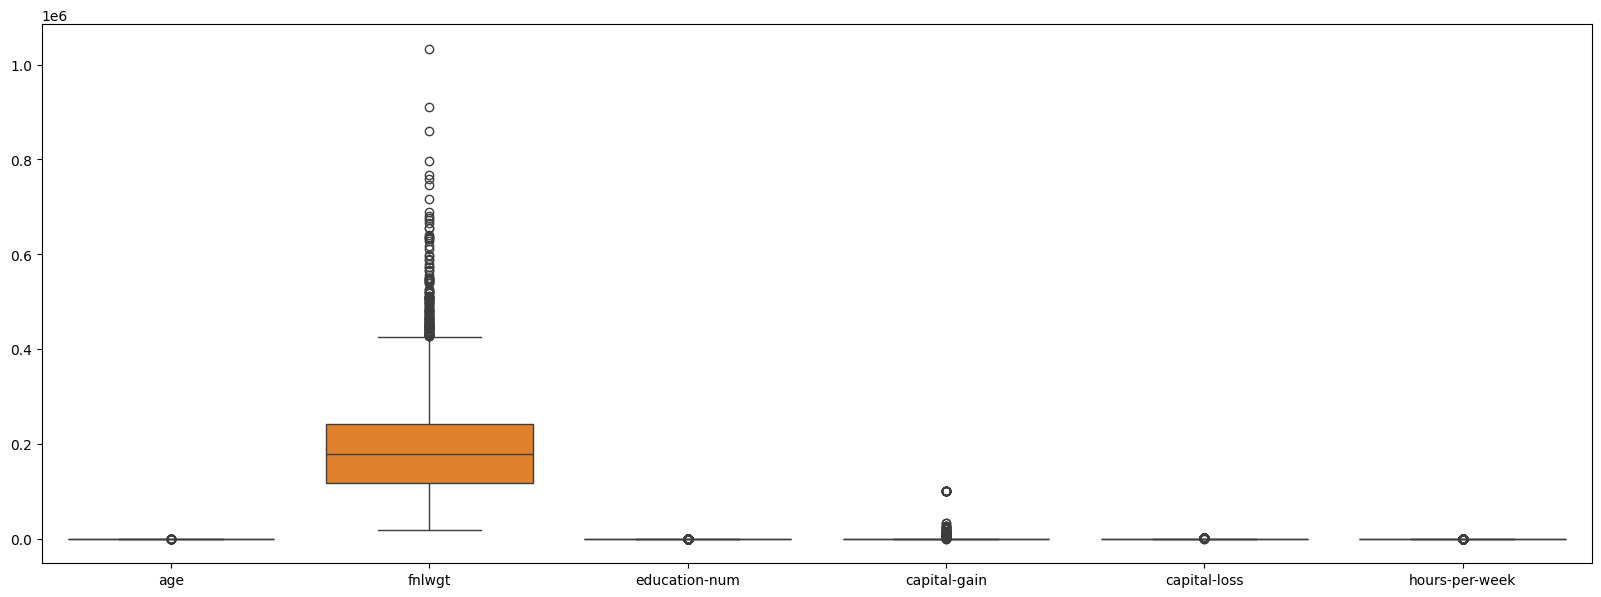

In [ ]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

- The boxplot visualizes the distribution of numerical data and highlights the presence of outliers.
- The 'age' and 'education-num' variables have a symmetrical distribution with minimal outliers.
- 'fnlwgt' shows a right-skewed distribution with many high-value outliers.
- Both 'capital-gain' and 'capital-loss' are heavily skewed, with most data points at the lower end and some extreme outliers.
- 'hours-per-week' has a fairly even distribution with outliers at both ends. The y-axis is on a logarithmic scale to accommodate the wide range of the data.

<ipython-input-57-0d33ea995755>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")


<Axes: >

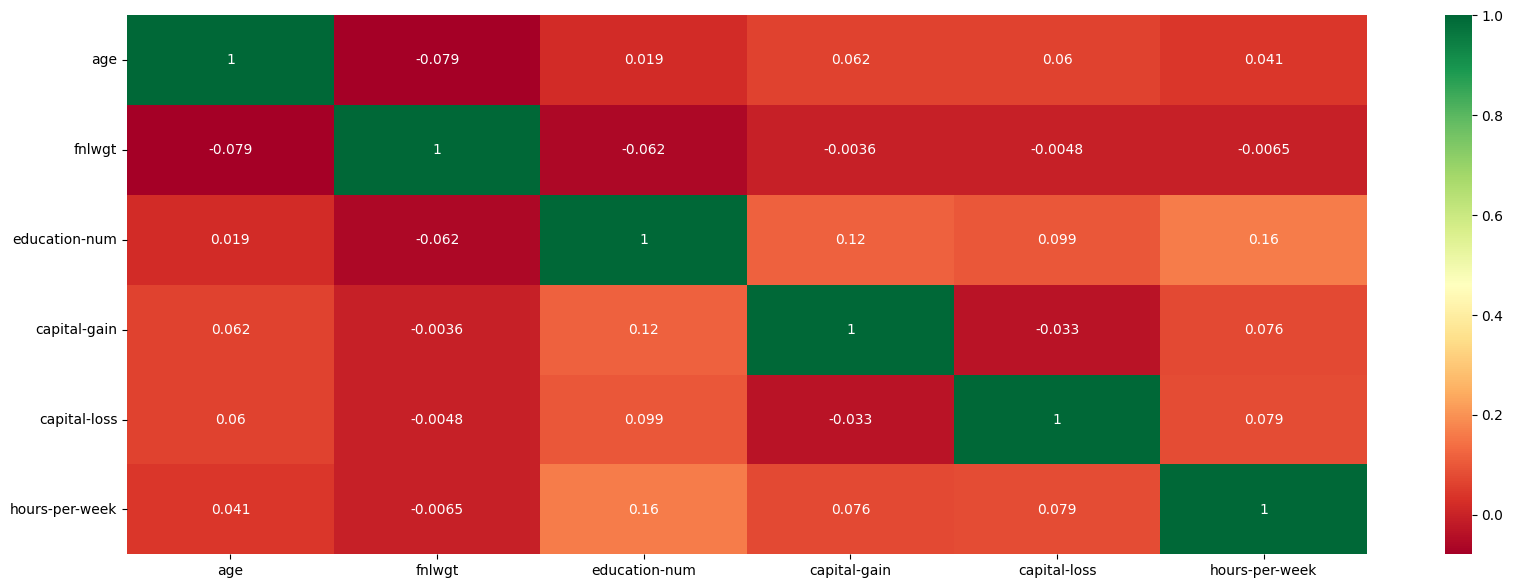

In [ ]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

- From the heatmap, it seems that there are no strong correlations between the variables as all coefficients are close to zero.
- The strongest positive correlation is between education-num and hours-per-week (0.16), suggesting a mild relationship where higher education might slightly correlate with more hours worked per week.
-  The strongest negative correlation is between age and fnlwgt (-0.079), which is still very weak.

- The heatmap indicates that in this dataset, there are no strong correlations between the variables presented.
-  Most variables have very weak positive or negative correlations with each other, implying that the variables are largely independent in this particular context.

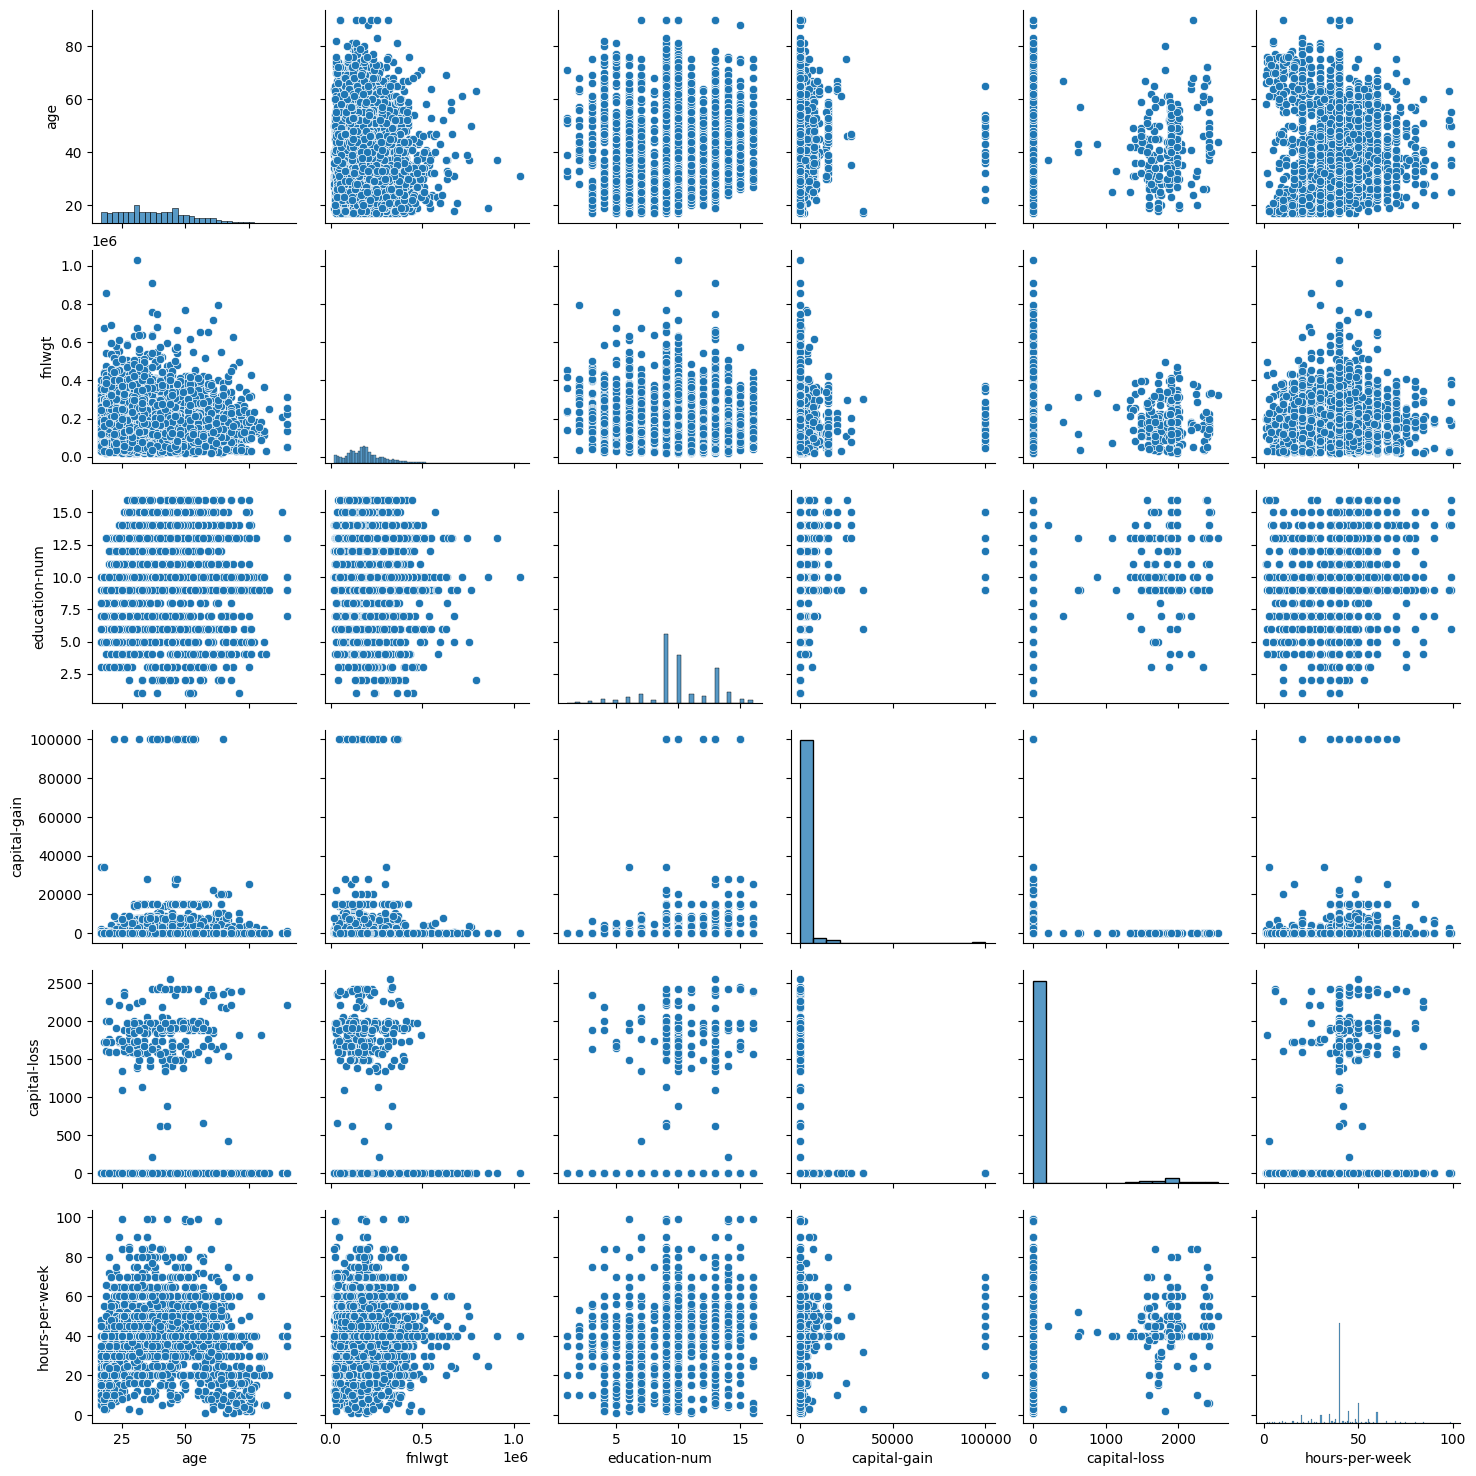

In [ ]:
# pair plot to check the colinearity
sns.pairplot(data)

1. Diagonal: The diagonal plots are histograms for each variable, showing the distribution of that single variable's values.
2. Off-Diagonal: Each plot off the diagonal shows the relationship between two variables. One variable is on the x-axis and the other is on the y-axis. These scatter plots can reveal correlations, patterns, and trends between pairs of variables.
3. Variable Names: Along the edges of the matrix, you can see names like 'age', 'fnlwgt', 'education', 'education-num', 'capital-gain', 'capital-loss', and 'hours-per-week'. These are the names of the variables being plotted.
4. Data Points: The individual points represent data entries. For the histograms on the diagonal, the height of each bar represents the number of entries for that value or range of values. For the scatter plots, each point represents an individual record's values for the two variables in question.

- the code simulates missing data by randomly removing 5% of 'workclass' values.
- Imputation is performed by replacing missing values with the most frequent category in the 'workclass' column.
- Categorical variables are one-hot encoded to prepare for model training.
- A Logistic Regression model is trained on the data, and predictions are evaluated on the test set.
- The accuracy of the model and the confusion matrix are calculated as performance metrics.
- This code demonstrates a process of handling missing data, imputing values, encoding categorical variables, and training a simple logistic regression model for classification.
- The resulting accuracy and confusion matrix provide insights into the performance of the model on the test set after handling missing values.

--> Accuracy: The model achieved an accuracy of approximately 79.06% on the test set. This indicates that about 79% of the instances were correctly classified.

--> Confusion Matrix:

- True Negative (TN): 741 instances correctly predicted as '<=50K'.
- False Positive (FP): 28 instances incorrectly predicted as '>50K'.
- False Negative (FN): 186 instances incorrectly predicted as '<=50K'.
- True Positive (TP): 67 instances correctly predicted as '>50K'.

MIT License

Copyright (c) 2024 nikitagupta09

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.